In [25]:

import numpy as np
N = 720
energy= np.zeros(N)
habit = np.zeros(N)
ghrelin = np.zeros(N)
glucose = np.zeros(N)
appetite = np.zeros(N)
k_an_nhin = np.zeros(N)
k_nhin_an = np.zeros(N) 
indicator_intake = np.zeros(N) 
stomach = np.zeros(N)
quality_food = np.zeros(N)

In [26]:
#1. Tham so cho E
E_timeLowerBound = 300
E_timeUpperBound = 1260
#1. Tinh E
for i in range(0,N):
    t = 2* i
    if E_timeLowerBound< t and t < E_timeUpperBound:
        energy[i] = 1

In [27]:
#2. Tham so cho thoi quen an H
t_lowerMeal = ['0', 260,580,600,600]
t_upperMeal = ['0',1000,1400,1400,1440]
t_meanMeal = ['0',500,750,610,1140]
t_sigmaMeal = ['0',85,20,240,87]
w_peak =['0',0.92,0.45,0.65,0.65]
w_snack= 0.047
import matplotlib.pyplot as plt
import math
def indicate_function(val,dau, cuoi):
    if(dau <=val and val <=cuoi):
        return 1
    else:
        return 0

thoi_gian = np.linspace(0,24, 1000)

def Habit(tgian):
    res = w_snack
    for i in range(1,5):
        res +=indicate_function(tgian,t_lowerMeal[i],t_upperMeal[i])*w_peak[i] *math.exp(-1/2*((tgian-t_meanMeal[i])/t_sigmaMeal[i])**2)
    return res
#2. Tinh ham habit
for i in range(0, N):
    habit[i] = Habit(2*i)

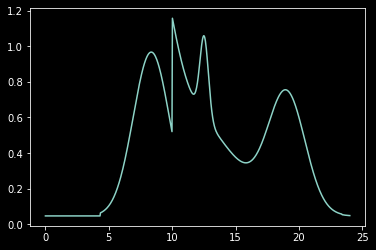

In [28]:
x = np.linspace(0,24,N)
plt.plot(x,habit)

In [29]:
#3,4,5,6,7,8,9: Cac tham so con lai can init va vong lap
#Init
ghrelin[0] = 178
glucose[0] = 5
stomach[0] = 0

p_ij_HA = 0.01
w_A = 0.1
A_max =300
k_an_nhin[0] = 0.001
l_A50 = 120
lambda_AG = 0.3
appetite[0] = A_max * ghrelin[0]/(ghrelin[0] + l_A50) * np.exp(-lambda_AG*glucose[0])
k_nhin_an[0] = p_ij_HA * habit[0] * (1 + w_A*appetite[0]/A_max)

indicator_intake[0] = 0

for i in range(1,N):
    #3. Ghrelin
    lambda_LS = 0.00462098
    k_XL = 0.02
    L_max = 208
    k_LS_max  = k_XL *L_max
    bthuc = k_LS_max * np.exp(-lambda_LS*stomach[i-1]) - k_XL*ghrelin[i-1]
    ghrelin[i] = ghrelin[i-1] + 2* bthuc

    #4. Glucose
    k_XG = 0.0072
    k_XGE = 0.0036
    k_G = 0.4464
    t_12 = 45
    k_XS = np.log(2)/t_12
    eta_G = 0.2
    ro_GS = 0.9
    vG = 12.4
    bthuc = -(k_XG + k_XGE*energy[i-1])*glucose[i-1] + (k_G+k_XS*eta_G*ro_GS*stomach[i-1])/vG 
    glucose[i] = glucose[i-1] + 2* bthuc

    #5. Appetite
   
    bthuc = A_max * ghrelin[i]/(ghrelin[i] + l_A50) * np.exp(-lambda_AG*glucose[i])
    appetite[i] = bthuc

    #6.k_ji
    k_nhin_an[i] = p_ij_HA * habit[i] * (1 + w_A*appetite[i]/A_max)

    #9. stomach
    k_XS =0.0154033
    k_S =16.5
    bthuc = -k_XS*stomach[i-1] + k_S* indicator_intake[i-1]
    stomach[i] = stomach[i-1] + 2*bthuc
    #7.k_ij
    k_ij0 = 0.001
    ps_ij = 0.0001
    pG_ij = 0.0001
    k_an_nhin[i] = k_ij0 + ps_ij*stomach[i] + pG_ij*glucose[i]
    #8 indicator intake
    import random
    u = random.uniform(0,1)
    if(indicator_intake[i-1]==0):
        if(u<=1-np.exp(-k_nhin_an[i-1] * 2)):
            indicator_intake[i] = 1
    else:
        if(u > 1-np.exp(-k_an_nhin[i-1] * 2)):
            indicator_intake[i] = 1
    
    #9. Quality of food
    quality_food[i] = indicator_intake[i] * k_S * 2
    


In [30]:
np.log(2)/45

0.015403270679109895

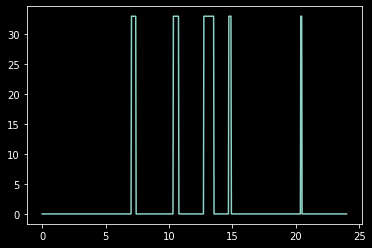

In [31]:
x = np.linspace(0,24,720)
plt.plot(x, quality_food)
plt.show()

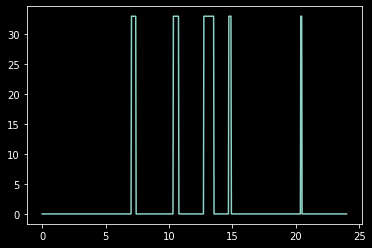

In [32]:
plt.plot(x,quality_food)
plt.show()

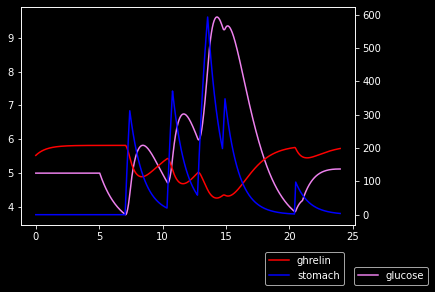

In [33]:

fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

ax_left.plot(x,glucose, color = 'violet',label = "glucose")
ax_right.plot(x,ghrelin,color = 'red',label = "ghrelin")
ax_right.plot(x,stomach,color = 'blue',label = "stomach")
plt.legend(bbox_to_anchor=(0.98,-0.3), loc='lower right')
ax_left.legend(bbox_to_anchor=(0.98,-0.3), loc='lower left')
plt.show()

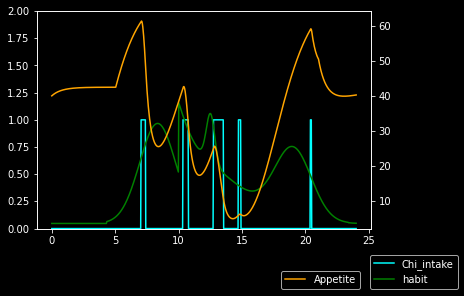

In [34]:

fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.set_ylim([0,2])
ax_left.plot(x,indicator_intake, color = 'cyan',label = "Chi_intake")
ax_left.plot(x,habit,color = 'green',label = "habit")
ax_right.plot(x,appetite,color = 'orange',label = "Appetite")
plt.legend(bbox_to_anchor=(0.98,-0.3), loc='lower right')
ax_left.legend(bbox_to_anchor=(0.98,-0.3), loc='lower left')
plt.show()

In [35]:
sum = 0
for i in range(0,N):
    sum += quality_food[i]
sum

1881.0

In [36]:
cabonhydrat = sum * eta_G
cabonhydrat

376.20000000000005